# Data Diri
Robertus Bagaskara R.P. / robertusbagaskara@gmail.com

# Import Library
Tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)  # cek versi tensorflow

2.4.0


Library lain


In [2]:
import zipfile,os,shutil
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Dataset
Download dataset

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-01-21 08:35:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.01MB/s    in 4m 59s  

2021-01-21 08:40:13 (1.03 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



Ekstrak dataset

In [4]:
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Split dataset

In [5]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [6]:
train_rock = os.path.join(train_dir, 'rock')
val_rock = os.path.join(validation_dir, 'rock')

train_paper = os.path.join(train_dir, 'paper')
val_paper = os.path.join(validation_dir, 'paper')

train_scissors = os.path.join(train_dir, 'scissors')
val_scissors = os.path.join(validation_dir, 'scissors')

Buat direktori

In [7]:
list_directory=[train_dir,validation_dir,train_rock,val_rock,
                train_paper,val_paper,train_scissors,val_scissors]
for i in list_directory:
  os.mkdir(i)

# Train & Test Split
Membagi data untuk data train dan 40% data validasi

In [8]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [9]:
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

# Augmentasi Gambar

In [10]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

# Image Generator

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        # karena kita merupakan masalah klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Membuat Model Sequential
Membuat model

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Membuat callback function untuk stop training

In [13]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):  # berhenti training ketika accuracy diatas 96%
      self.model.stop_training = True

stopTraining = Callback()

Compile model

In [14]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# Training Model

In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=32,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[stopTraining])

Epoch 1/100
32/32 - 8s - loss: 1.1196 - accuracy: 0.3281 - val_loss: 1.0922 - val_accuracy: 0.4000
Epoch 2/100
32/32 - 6s - loss: 1.1037 - accuracy: 0.3047 - val_loss: 1.0979 - val_accuracy: 0.3500
Epoch 3/100
32/32 - 6s - loss: 1.0961 - accuracy: 0.4062 - val_loss: 1.0896 - val_accuracy: 0.6000
Epoch 4/100
32/32 - 7s - loss: 1.0555 - accuracy: 0.4844 - val_loss: 0.8325 - val_accuracy: 0.7500
Epoch 5/100
32/32 - 6s - loss: 0.8011 - accuracy: 0.6484 - val_loss: 0.5743 - val_accuracy: 0.8500
Epoch 6/100
32/32 - 6s - loss: 0.6012 - accuracy: 0.7734 - val_loss: 0.3306 - val_accuracy: 0.9500
Epoch 7/100
32/32 - 6s - loss: 0.5011 - accuracy: 0.8516 - val_loss: 0.4378 - val_accuracy: 0.8500
Epoch 8/100
32/32 - 6s - loss: 0.4024 - accuracy: 0.8672 - val_loss: 0.3002 - val_accuracy: 0.9000
Epoch 9/100
32/32 - 6s - loss: 0.4300 - accuracy: 0.8594 - val_loss: 0.3776 - val_accuracy: 0.8500
Epoch 10/100
32/32 - 6s - loss: 0.2853 - accuracy: 0.8828 - val_loss: 0.3407 - val_accuracy: 0.9000
Epoch 11/

# Visualisasi Accuracy dan Loss pada Proses Training
Accuracy

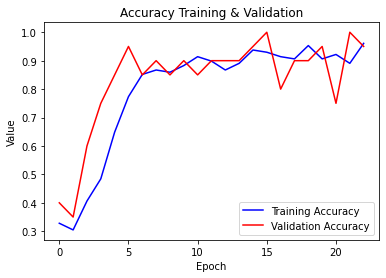

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# Loss

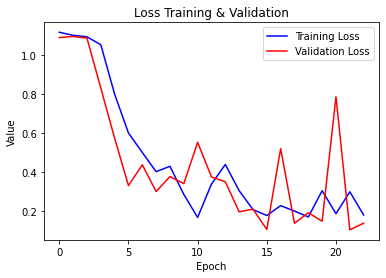

In [17]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color = 'red')
plt.title('Loss Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# Testing Model

Upload gambar yang ingin diuji

In [18]:
image_test = files.upload()

Saving paper.jpeg to paper.jpeg


Buat fungsi predict

In [19]:
def predict(image_upload):
  for fn in image_upload.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
  
    print(fn)
    if classes[0,0] != 0:
      print('it is Paper!')
    elif classes[0,1] != 0:
      print('it is Rock!')
    else:
      print('it is Scissors!')

Lakukan Testing

paper.jpeg
it is Paper!


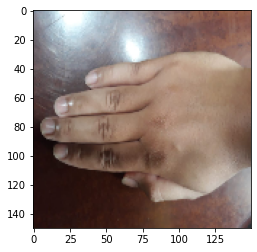

In [20]:
predict(image_test)